# Data Analysis

Electronic data and computational data analysis are gaining ever increasing importance in study, research and employment in the engineering and science disciplines. Computer simulations and modern experimental apparatus generate data in huge volumes and we often need to find automated ways of extracting information from this mass of data, and polished ways of presenting this infomation clearly.

There are many ready-made tools to help you analyse data, but what if you want to do something a bit different, like look at the data in a new way or develop a new style of presentation? Knowing how to program and script with a general-purpose language like python will give you huge flexibility in how you handle data and free you from the restrictions that fixed packages place on what you can do and discover.

In this notebook, we will look at ways to use python to read in, analyse and then visualize some different types of data. Along the way we will introduce (or remind you of) some important statistical tools that every scientist and engineer should have at their disposal.

## Reading data from a file 

Though you may sometimes enter data directly into a python script or notebook, it is likely that you will often want to deal with a large amount of data in a file. Here we will look at some useful ways of reading such files and getting the data into a nice form for manipulation and analysis within python.

Throughout this part of the tutorial, we will assume that we are dealing with files in a format that we already know. It is also possible to use all sorts of tricks and conditional code to write python functions that will automatically detect file formats, but that is beyond the scope of the course for the moment.

### Reading data into an array - the easy way

The file we are going to work with first is `Data/test_data.txt`. Take a look at the contents by opening it up in a text editor such as Notepad - it just contains a small amount of toy data.  

We want to get playing with data as quickly as possible today, so we're going to read in the file the easy way. If you want to learn more about file handling and reading data then take a look at the optional material in the extension notebook (it is worth learning how to do things the long way around - sometimes the simpler methods won't work for you and you will need to handle files at the more fundamental level).

The easy way to get data from a file into a numpy array is to use the `loadtxt()` function from numpy:

In [29]:
import numpy as np

myDataArray = np.loadtxt('Data/test_data.txt', skiprows=1)
print(myDataArray)

[[ 1.    3.43  3.56]
 [ 2.    5.32  4.54]
 [ 3.    4.32  1.94]]


The loadtxt() function is part of numpy, so we need to ask for it as np.loadtxt(). This function needs to know the name and location of the file that we want to read and so we pass this information to the function in the first argument. The location of the file is specified relative to the notebook that we are working on. There is a folder named 'Data' in the same location as this notebook, which contains our test data.

Notice how we were able to ask `loadtxt()` to skip the first row of the file using the second argument to the function. If you take a look at the contents of the file then you will see why we needed to do this.

For our first exercise we would also like to exclude the first column of data from the file when we load it, i.e. we want to just read the second and third columns. 

### <span style="color: red"> Task:</span> Read in only the second and third columns

There are other options for the `loadtxt()` function. Have a look in the documentation to see what else it can do. 

Now try using `loadtxt()` to read in the contents of our file but this time include only the second and third columns (Hint: remember how Python indices work!). 

### <span style="color: blue"> Solution:</span>

Easy when you know how! Now let's do something more interesting with our new abilities.....

## Interactive data analysis 

Let's take a look at some real data taken from some research performed in the School of Materials at Manchester:

<figure>
<img src="Figures/zr_corrosion_figure.png" width='400'>
<figcaption>Figure: Autoclave corrosion weight gain profile of recrystallized ZIRLO after 180 days of autoclave exposure. From: Wei et al. Acta Materialia 2013;61:4200</figcaption>
</figure>

These are data for the oxide thickness (measured via a gain in weight) on a sample of zirconium alloy (used in nuclear fuel rods) in an autoclave. The data used to produce this figure in the paper are in the file <code>Data/zr_corrosion.txt</code>. The file looks like this (take a look at the file in a text editor):

\#Exposure Weight_gain  
21.1927, 14.636  
20.8716, 16.7292  
4.8165, 8.568  
10.5963, 12.4509  
.....

### <span style="color: red"> Task:</span> Read in the corrosion data

Use `loadtxt()` to read the data from the text file into a numpy array called `myDataArray`. (Hint: you will need to specify the 'delimiter' as a comma. Take a look at the documentation for loadtxt() to find out how to do this. If you don't know what is meant by 'delimiter' then google 'file dilimiter' and have a look at the results.)

### <span style="color: blue"> Solution:</span>

### Checking the data 

Now we will plot the data just to check that it looks right:

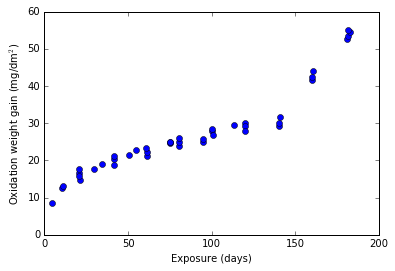

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(myDataArray[:,0],myDataArray[:,1], 'bo')
plt.xlabel('Exposure (days)')
plt.ylabel('Oxidation weight gain (mg/dm$^2$)')


Notice how easy it is to create an attractive plot using what we learned in the first session. We simply import the plotting package, specify that we want plots to appear within our notebook ('inline') and then ask for a plot of the data, specifiying a few options for formatting. Make sure that you understand what the 'plot' function is doing. The first two arguments are the 'x' and 'y' values that we want to plot. These are the two columns of the array that we read the data into and we select them individually using array slicing, just as we learned in the last session. What do you thing the third argument, 'bo' is telling plot() to do? Have a read of the documentation and try a few different values (how about 'ro' or 'b-'?).

### Fitting a model to the data

One thing that we often need to do with raw data is to fit a curve to it, either to check if the data conform to a physical model of a process or to extract some empirical fitting parameters (or perhaps just to generate a best fit line as a guide for the eye of the viewer). In the case of our corrosion data, we expect the weight gain to vary with exposure as a power law. We will now test this by attempting to fit the following relationship to the data:

$$W = (aT)^k$$

where $W$ is the weight gain in mg/dm$^2$ and $T$ is the exposure time in days.

Fortunately, scientific python (SciPy), and particularly the <code>optimize</code> package, has a lot of useful tools for curve fitting. There are some specifically for fitting certain functions, e.g. polynomials, but we will use the general functionality in <code>curve_fit</code> because it is very flexible.

Start by importing the package that we need:

In [33]:
from scipy.optimize import curve_fit

How did we know to import this package? How do we know that the curve fitting tools are in the <code>optimize</code> package as part of <code>scipy</code>? The truth is, that when you are programming you will often need to turn to the internet to work out how to do something. When I was writing this notebook I had never heard of the <code>optimize</code> package, but I figured that python would have *some* sort of tool for curve fitting. So I just googled something like 'python curve fitting' and looked at what came back. Sure enough, there were some simple examples of how to fit a curve with python, so I took those and adapted them, below.

Next we need to define a function which holds the form of our model:

In [34]:
def model(T, a, k):
    return (a*T)**k

Remeber what we are doing here (see the previous notebook). The function that we define is a piece of computational machinery. It takes in three values (which we choose to call `T`, `a` and `k`) and returns a value which is `a` multiplied by `T`, all to the power `k`.

Looking at the plot above, it is clear that only the first part of the data will conform to our model so we only want to fit the first part of the data, up to around 150 days of exposure. 150 days corresponds to around the 36th data point, so we'll now copy part of the full dataset into a couple of separate arrays for exposure time $T$ and weight gain $W$:

In [35]:
T = myDataArray[0:36,0]
W = myDataArray[0:36,1]

If you are not confident about what we did above, just add another cell in the notebook and print out the new arrays T and W to look at what is inside. Now we will use <code>curve_fit</code> to fit our model to the data:

In [36]:
popt, pcov = curve_fit(model, T, W)

Take a look at the documentation for <code>curve_fit()</code> (or google for some examples of its use). The first argument is the functional form that we want to fit (remember that we have stored this in our function <code>model(T,a,k)</code>). The second argument is the data for our independent (input) variable that we want to fit, in this case our array of times. Note that we need to have set up our function so that the independent variable is the first argument. The third argument of <code>curve_fit()</code> is the data for the dependent (output) variable, in this case our array of oxide weight gains.

The <code>curve_fit()</code> function will now work out the best values of the other arguments ($a$ and $k$) in our <code>model()</code> function to fit the data for $W$ and $T$ that we have provided.

<code>curve_fit()</code> returns two numpy arrays and this is why we have put the names of two variables (separated by a comma) on the left of the equals sign above. The first, which we have assigned to the variable <code>popt</code> contains the optimised values of our model parameters (in this case $a$ and $k$). The second contains the covariance matrix for the raw data and the model (we can ignore this for our purposes, but you could use these values to judge the quality of your fit to the data). Let's have a look at the contents of the array <code>popt</code>: 

In [37]:
print(popt)

[ 72.43176863   0.37407504]


These are the best-fit values of $a$ and $k$ respectively. We can visualize the results of our fitting by generating some data using the model and the optimised parameters from `popt` and then plotting it on the same chart as the raw data:

[]

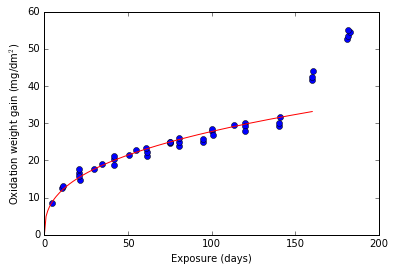

In [38]:
exposure=np.linspace(0,160,160)
weightfit=model(exposure,popt[0],popt[1])

plt.plot(myDataArray[:,0],myDataArray[:,1], 'bo')
plt.plot(exposure,weightfit, 'r')
plt.xlabel('Exposure (days)')
plt.ylabel('Oxidation weight gain (mg/dm$^2$)')
plt.plot()

Think carefully about what the above code does. Add extra cells to examine the contents of the new variables (<code>exposure</code> and <code>weightfit</code>) that we have created. <code>exposure</code> is simply a numpy array containing a range of values to represent different oxidation times. We then pass this array of times to our <code>model()</code> function and also specify the values of $a$ and $k$ using the values in <code>popt</code> that we got from <code>curve_fit</code>. We assign these predictions for the weight gain to the array <code>weightfit</code>. The rest of the code above simply replots the raw data as blue points and then plots our predictions based on the best fit model as a red line.

### <span style="color: red"> Task:</span> Find a best-fit parabolic relationship

If the oxide scale forming on the Zr surface were completely protective, then we would expect a parabolic relationship between weight gain $W$ and time $T$:

$$ W^2 = a T \qquad $$

This is similar to the relationship that we fitted above, but with the constraint that $k=1/2$.

Repeat the fitting procedure above to find the best-fit value of $a$ for a parabolic relationship. Plot your fitted relationship and the experimental data on a single plot and comment on the result.

### <span style="color: blue"> Solution:</span>

## Errors and statistics

Materials science is an experimental science and so we need to know how to make quantitative statements about our data. This means that we need to understand how to calculate such important parameters as the:
* mean,
* standard deviation, and
* standard error

of a dataset. We'll look at each of these in turn now:

### Basic statistics

Let's assume that we have a sample of measurements of some physical quantity. To take a specific example, imagine we have used a nano-indenter to determine the hardness of a series of grains in a polycrystalline sample. Let's denote these hardness measurements $h_i$ where $i$ runs from 1 to $N$, the number of samples we have taken:

$$\{ h_i \}_{i=1}^{N} = \{h_1, h_2, \dots h_{N-1}, h_{N} \} .$$

This is our *sample*. Most often we are not interested directly in our sample, so much as in what our sample can tell us about the *population* from which it is drawn. So in our example, we might want to know the average hardness of a grain in our material, but we can only afford to sample the hardness of $N$ grains. How do we use our specific sample to tell us something about the material in general? 

#### Mean

As far as the mean is concerned, things are quite straightforward. The mean of the sample (the *sample mean*) is as good an estimator of the *population mean* as we can get - it is an *unbiased estimator*. The mean of our sample is defined as:

$$
 \bar{h}  = \frac{1}{N}\sum_{i=1}^{N} h_i,
$$

where $ \bar{h}$ denotes the mean of $h$. 

#### Standard deviation

So we have now estimated the mean hardness of a grain, but what about the variability in hardness? Do all the grains in our material have a hardness very close to the mean value or is there a large spread? A useful measure of the spead of values in our sample is the *standard deviation*:

$$
s_{\mathrm{sample}} = \sqrt{\frac{1}{N}\sum_{i=1}^N(h_i-\bar{h})^2}.
$$

This is the *sample standard deviation* and it is a measure of how widely the hardness varies in our *sample*. But what about the values of hardness for the whole material? Is the *sample* standard deviation a good estimator for the *population* standard deviation? If $N$ is large enough then the answer is yes, but for $N \lesssim 100$, $s_{\mathrm{sample}}$ tends to underestimate the population standard deviation: $s_{\mathrm{sample}}$ is a *biased* estimator for $s_{\mathrm{population}}$. Correcting this bias completely is a challenging problem, but we can obtain a better estimate of the variability in the population by using the following statistic (known as the *corrected sample standard deviation*):

$$
s_{\mathrm{corrected}} = \sqrt{\frac{1}{N-1}\sum_{i=1}^N(h_i-\bar{h})^2}.
$$

#### Standard error

We said above that the *sample mean* is an unbiased estimator of the *population mean*, but how good is this estimate? If we had taken only a small sample of grains (small $N$) then there is a significant chance that we have not got a representative sample: we might, for example, have sampled mostly only unusually hard grains. As $N$ increases we will tend to get a more representative sample, but it would be useful to have an estimate of how much the mean of a small sample might vary from the true mean of the population as a whole. This is given by the *standard error of the mean*:

$$
\mathrm{SE} = \frac{s_{\mathrm{sample}}}{\sqrt{N}}.
$$

Now there is an important caveat to the above, which is to *remember to think* at all times when working with statistics: don't just blithely apply the formulae! For example, a collosally large number of samples $N$ is not a guarantee that you have a representative sample of your material. You need to think like a scientist and consider, for example, other sources of bias than pure statisitics. What if your ten-thousand hardness data all came from the heat affected zone of a weld of your material rather than being representative of the bulk?

#### Standard error vs standard deviation

The difference between standard error and standard deviation can be confusing, because of the similar names and similar formulae, but you do need to know the difference. The standard *deviation* tells us something about the spread of values (in our case the values of hardness) in our sample as an estimate of this spread in the population. The standard *error* tells us how the mean of a small sample of values would be spread around the true value of the mean of the population. If we are using our sample of values to estimate the mean value of e.g. hardness for the population, then it is the standard error that we should use as an error bar in the estimate of the mean.

Maybe this all still seems a little obscure. Let's use python to play with some of these ideas....



### Exploring statistics with python 

In this section we will use python to generate samples of hardness measurements from an imaginary population of grains with a well defined mean hardness and standard deviation. Let's assume that the mean hardness is 10.0 (population mean) and that the hardness of the grains is normally distributed (look up the normal distribution if you have forgotten what it is) about this mean with a standard deviation of 2.0 (population standard deviation) (let's not worry about units, for once). We can generate a single sample from this population using the following command:

In [40]:
import numpy as np
popMean = 10.0
popSD = 2.0
np.random.normal(popMean,popSD)

9.060598375502687

You'll get a different value every time you execute the above cell. Now let's simulate an experiment in which we undertake a hardness measurement on ten randomly selected grains. This will give us a sample of ten hardness measurements:

In [41]:
N = 10 # Number of measurments in sample
sample = np.random.normal(popMean,popSD,N)
print(sample)


[ 10.25013921  13.75349633   8.9991542    7.31194283   7.27069031
   8.88302179   9.01099021   9.99566348   8.48943576   9.12031152]


Notice that we can automatically generate multiple measurements with the final optional argument to <code>random.normal()</code>.

### <span style="color: red"> Task:</span> Calculate basic statistics for your sample
Now calculate the mean, sample standard deviation, corrected sample standard deviation and the standard error based on the above sample of ten observations. (Hint: obviously you do not yet know the names of the python functions that will do this - try having a guess at their names and googling, e.g. 'numpy mean')

### <span style="color: blue"> Solution:</span>

Now, each of you will have ended up with a different random sample. Some of you will find that your sample statistics are over-estimates of the mean and standard deviation of the population and some of you will find that they are under-estimates. This sort of variation is typical of small sample sizes.

### <span style="color: red"> Task:</span> Calculate basic statistics for a much larger sample
Repeat the above exercise but with a large value of $N$, say $N=10000$.

### <span style="color: blue"> Solution:</span>

You should now find that your sample mean is very close to the population mean (and your standard error should be small, because a large sample is unlikely to have much spread in the sample mean). You should also find that both the sample standard deviation and the corrected sample standard deviation are very close to the true population standard deviation (and they will be very close to each other because $\sqrt{N/(N-1)}$ is very close to 1 for large $N$).

Let's explore this some more:

### <span style="color: red"> Task:</span> Explore the behaviour of a sample with changing sample size

In the cell below is some python code to generate a random sample and then plot a histogram of the data. The true population distribution is shown for comparison. Try varying the sample size $N$ and observe how the output changes.

Mean = 10.2033268351
Sample SD = 1.97436524272
Corrected SD = 2.02565599814
Std Error = 0.441481489514


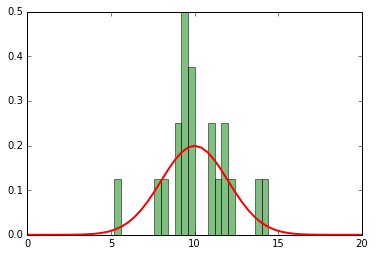

In [44]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

N = 20
sample = np.random.normal(popMean,popSD,N)
n, bins, patches = plt.hist(sample, 50, normed=1, range=(0,20), facecolor='green', alpha=0.5)
y = mlab.normpdf( bins, popMean, popSD)
l = plt.plot(bins, y, 'r', linewidth=2)

print("Mean = " + str(np.mean(sample)))
print("Sample SD = " + str(np.std(sample)))
print("Corrected SD = " + str(np.std(sample)*np.sqrt(N/(N-1))))
print("Std Error = " + str(np.std(sample)/np.sqrt(N)))


### Sample vs population statistics

Just to hammer home the point about the differences between the sample statistics and the population statistics for which we use them as estimates, let's use Python to simulate the taking of many small samples from our population, then calculate the sample statistics for each sample and see how they are distributed. Let's go for 1000 samples of $N=10$:

In [45]:
N = 10 # Number of observations in each sample
nSamples = 1000 # Number of samples
sample = np.random.normal(popMean,popSD,(N,nSamples))
means = np.mean(sample,0)
stds = np.std(sample,0)
cstds = np.std(sample,0)*np.sqrt(N/(N-1))
stderrs = np.std(sample,0)*np.sqrt(1/N)

First let's look at the distribution of the sample means:

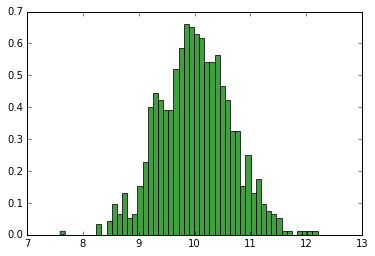

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
n, bins, patches = plt.hist(means, 50, normed=1, facecolor='green', alpha=0.75)

Notice that the sample means are distributed around the true population mean - the sample mean is an unbiased estimator for the population mean. We can calculate the mean and standard deviation of the sample means across our multiple samples:

In [47]:
print('Mean of sample means = ' + str(np.mean(means)))
print('Std Dev of sample means = ' + str(np.std(means)))

Mean of sample means = 10.0053075503
Std Dev of sample means = 0.640426751402


It is the standard deviation of the sample means that the standard error is supposed to provide an estimate of. In fact, if we take the mean value of the standard errors from each of our 1000 samples of $N=10$ observations then we get:

In [48]:
print('Mean of Std Errors = ' + str(np.mean(stderrs)))

Mean of Std Errors = 0.578202191243


which is pretty close to the standard deviation of the sample means found above.

Finally, let's examine the mean values across all samples for the sample standard deviation and the corrected sample standard deviation:

In [49]:
print('Mean of Std Devs = ' + str(np.mean(stds)))
print('Mean of Corrected Std Devs = ' + str(np.mean(cstds)))

Mean of Std Devs = 1.82843587243
Mean of Corrected Std Devs = 1.92734063748


Notice that the sample standard deviation on average tends to underestimate the population standard deviation, whereas the corrected standard deviation is a better estimate (as intended).

### Formatting output using python

In this section, we'll show you how to use text formatting commands to write some output to the screen in an easier-to-read format. We'll then also give a demonstration of how to write data to a file. We need something to work with so let's use the following data:

<figure>
<img src="Figures/pores_unstrained.png" width='150'>
<figcaption>Figure: Diameters of two random samples of pores in a metal foam</figcaption>
</figure>

These data are contained in the file `pores_unstrained.txt` in the `Data` folder (you could take a look at the format using a text editor):

In [50]:
import numpy as np
sampleA = np.loadtxt('Data/pores_unstrained.txt', delimiter=',', usecols=(0,))
sampleB = np.loadtxt('Data/pores_unstrained.txt', delimiter=',', usecols=(1,))

<code>numpy</code> has all the basic statistics built in: mean, variance and standard deviation are all easily available. 

Since you are getting the hang of this now, I'm going to show you the use of all these functions at once and show how to display the results in a neatly formatted way.

Formatting output in python is relatively simple and you can use the same approach for formatting output to the screen and to a file.

In [51]:
titleA = 'Column A'
data1A = 5.62

print(titleA.rjust(16) + 'Column B'.rjust(16))
print('--------'.rjust(16) + '--------'.rjust(16))
print(str(data1A).rjust(16) + str(4.61).rjust(16))


        Column A        Column B
        --------        --------
            5.62            4.61


I hope some of the example above is self explanatory. Note the following:
- The + operator acts on strings to concatenate them
- <code>rjust()</code> right aligns a string and pads with spaces to the specified width
- Strings or variables of string type can be printed directly and directly operated on by <code>rjust</code>
- Numerical variables or values need to be converted to strings first using <code>str()</code>

Now to calculate some statistics.

In [52]:
print(''.rjust(16) + 'Sample A'.rjust(16) + 'Sample B'.rjust(16))
print('------------'.rjust(16) + '------------'.rjust(16) + '------------'.rjust(16))
print('Mean'.rjust(16) + str(np.mean(sampleA)).rjust(16) + str(np.mean(sampleB)).rjust(16))
print('Variance'.rjust(16) + str(np.var(sampleA)).rjust(16) + str(np.var(sampleB)).rjust(16))
print('Standard Dev.'.rjust(16) + str(np.std(sampleA)).rjust(16) + str(np.std(sampleB)).rjust(16))
print('Sample size'.rjust(16) + str(len(sampleA)).rjust(16) + str(len(sampleB)).rjust(16))


                        Sample A        Sample B
    ------------    ------------    ------------
            Mean    40.725491205    45.853126917
        Variance   13.6117246398   34.1416540674
   Standard Dev.   3.68940708513   5.84308600548
     Sample size              10              10


### Writing data to a file

We can use exactly the same approach to write this data to a file. First we open the file and assign it to a variable (but note that this time we use a 'w' flag for "write" rather than an 'r' flag):

In [53]:
myFile = open('Output/basic_stats.txt', 'w')

The variable name <code>myFile</code> now refers to the file that we have opened. Now we simply write to that file!

In [54]:
myFile.write(''.rjust(16) + 'Sample A'.rjust(16) + 'Sample B'.rjust(16) + '\n')
myFile.write('------------'.rjust(16) + '------------'.rjust(16) + '------------'.rjust(16) + '\n')
myFile.write('Mean'.rjust(16) + str(np.mean(sampleA)).rjust(16) + str(np.mean(sampleB)).rjust(16) + '\n')
myFile.write('Variance'.rjust(16) + str(np.var(sampleA)).rjust(16) + str(np.var(sampleB)).rjust(16) + '\n')
myFile.write('Standard Dev.'.rjust(16) + str(np.std(sampleA)).rjust(16) + str(np.std(sampleB)).rjust(16) + '\n')
myFile.write('Sample size'.rjust(16) + str(len(sampleA)).rjust(16) + str(len(sampleB)).rjust(16) + '\n')

myFile.close()

I used almost the same code as for printing to the screen, but instead I used the `write()` method of my file object. Note also that I needed to explicitly add a newline character '\n' to the end of each line. Use a text editor to take a look at the file that you have just written and make sure that it contains what you expect.

Finally, note that I remembered to close the file when I was done. Take a look at the file you have written and check that it contains what you expected.

## Optional extension material

If you are feeling keen, you could now download the extension notebook to learn more about the concepts that we have covered today.